<font size=2>Make the necessary impports:</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Forward_Prop_utils_1 import *
from Back_Prop_utils_1 import *

In [2]:
#read the csv files, convert them to numpy arrays and transpose them
X_train = pd.read_csv('X_train.csv').to_numpy().T
X_test = pd.read_csv('X_test.csv').to_numpy().T
Y_train = pd.read_csv('Y_train.csv').to_numpy().T
Y_test = pd.read_csv('Y_test.csv').to_numpy().T
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("Y_train.shape: ", Y_train.shape)
print("Y_test.shape: ", Y_test.shape)

X_train.shape:  (4, 119)
X_test.shape:  (4, 30)
Y_train.shape:  (3, 119)
Y_test.shape:  (3, 30)


<font size=3>Structure:</font>

<font size=2>Our NN model will have 2 layers. The 0<sup>th</sup> layer will be the input layer. There will be three hidden layers and the final/output layer will be the 2<sup>nd</sup> layer.<br/>
Layer[ 1 ] , the single hidden layer will have 5 hidden units.<br/>
Layer[ 2 ] or the final layer will have c units, where c = 3 is the number of classes.<br/><br/>
    Layer[ 0 ] --> X_train of shape (n<sup>[ 0 ]</sup>, m) where n<sup>[ 0 ]</sup> = 4 is the no. of features. m = 104, #examples.<br/><br/>
    Layer[ 1 ] --> <ul><li>input: X_train.
    <li>parameters: W<sup>[ 1 ]</sup> of shape ( n<sup>[ 1 ]</sup>, n<sup>[ 0 ]</sup> ) i.e., (5, 4) and b<sup>[ 1 ]</sup> of shape( n<sup>[ 1 ]</sup>, 1 ) i.e., (5, 1).
    <li>Z<sup>[ 1 ]</sup> = W<sup>[ 1 ]</sup> . X + b<sup>[ 1 ]</sup> of shape ( n<sup>[ 1 ]</sup>, m ) i.e., (5, 104).
    <li>a<sup>[ 1 ]</sup> = relu( Z<sup>[ 1 ]</sup> ) of shape ( n<sup>[ 1 ]</sup>, m ) i.e., (5, 104).</ul>
    Layer[ 2 ] --><ul><li>input: a<sup>[ 1 ]</sup>.
    <li>parameters: W<sup>[ 2 ]</sup> of shape ( n<sup>[ 2 ]</sup>, n<sup>[ 1 ]</sup> ) i.e., (3, 5) and b<sup>[ 2 ]</sup> of shape( n<sup>[ 2 ]</sup>, 1 ) i.e., (3, 1).
    <li>Z<sup>[ 2 ]</sup> = W<sup>[ 2 ]</sup> . a<sup>[ 1 ]</sup> + b<sup>[ 2 ]</sup> of shape ( n<sup>[ 2 ]</sup>, m ) i.e., (3, 104).
    <li>a<sup>[ 2 ]</sup> = softmax( Z<sup>[ 2 ]</sup> ) of shape ( n<sup>[ 2 ]</sup>, m ) i.e., (3, 104).
    </ul>
</font>

In [9]:
layer_dims = [4, 5, 3]

#initializing parameters
parameters = initialize_parameters(layer_dims)

print("shape of W1: ",parameters["W1"].shape,"\n")
print("shape of b1: ",parameters["b1"].shape,"\n")
print("shape of W2: ",parameters["W2"].shape,"\n")
print("shape of b2: ",parameters["b2"].shape,"\n")

shape of W1:  (5, 4) 

shape of b1:  (5, 1) 

shape of W2:  (3, 5) 

shape of b2:  (3, 1) 



In [7]:
#gradient descent
def  gradient_descent(parameters, X, Y, alpha, epochs, print_cost=False):
    costs = []
    accs = []
    for i in range(epochs):
        AL, caches = L_layer_Forward_Prop(X, Y, parameters)
        cost = compute_cost(AL, Y)
        acc = accuracy(AL, Y)
        grads = L_Layer_Back_Prop(AL, Y, caches)
        parameters = update_parameters(parameters, grads, alpha)
        
        # Print the cost every 100 training example
        if print_cost and i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if i % 10 == 0:
            costs.append(cost)
            accs.append(acc)
    
    print("Cost after iteration",epochs,":",cost)
    costs.append(cost)
    acc = accuracy(AL, Y)
    accs.append(acc)
    print("accuracy: ", acc)
    
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(alpha))
    plt.show()
    
    # plot the accuracy
    plt.plot(np.squeeze(accs))
    plt.ylabel('accuracy')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(alpha))
    plt.show()
    
    return parameters

Cost after iteration 1000 : 0.09592949792568485
accuracy:  99.15966386554622


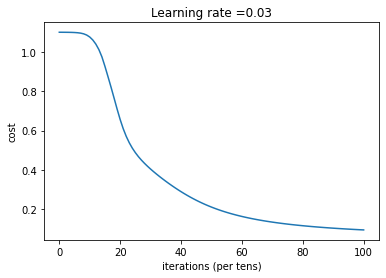

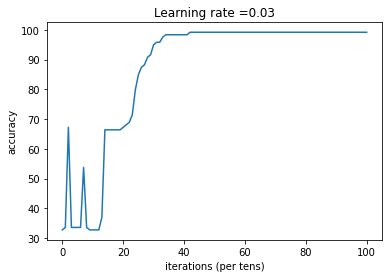

In [10]:
parameters = gradient_descent(parameters, X_train, Y_train, alpha=0.03, epochs = 1000, print_cost = False)

In [11]:
#evaluate on test data
AL, caches = L_layer_Forward_Prop(X_test, Y_test, parameters)
cost = compute_cost(AL, Y_test)
acc = accuracy(AL, Y_test)
print("cost:",cost)
print("accuracy: ", acc)

cost: 0.11584053533227788
accuracy:  96.66666666666667
